In [1]:
from moviepy.editor import VideoFileClip
from PIL import Image
import numpy as np
import pandas as pd
from PIL import ImageDraw

Names of path, videofile and type of JSON. Path can be empty if the video file and its videopipe output are at the same.

In [2]:
path = ''
v_name = 'HIGH_LIGHTS_I_SNOWMAGAZINE_I_SANDER_26'
task = '_face_detection_datamodel'
RESIZE_DIM = 640

Read face detection json

In [3]:
faces = pd.read_json(f"{path + v_name}/{v_name + task}.json", lines=True)
faces_detected = [f for f in faces.data[0] if len(f['faces']) > 0]

Read video file with moviepy

In [4]:
clip = VideoFileClip(v_name + '.mp4')

fps = clip.fps
frame_duration = 1 / fps

Play a subclip

In [5]:
#clip.subclip(t_start=0*frame_duration,
#             t_end=5*frame_duration).ipython_display()

Get the frame of the first detected face. moviepy gets frames by their timestap so we first convert the frame number to this.

If get_frame gives an OSError, make sure you have the right moviepy version (especially on Linux): \
pip uninstall moviepy \
pip install moviepy==2.0.0.dev2

In [6]:
def get_face_frame(clip, face):
    """ Returns the frame from the clip where the face detection detected a face. """
    
    frame_duration = 1 / clip.fps
    frame = clip.get_frame(face['dimension_idx'] * frame_duration)
    return Image.fromarray(frame)

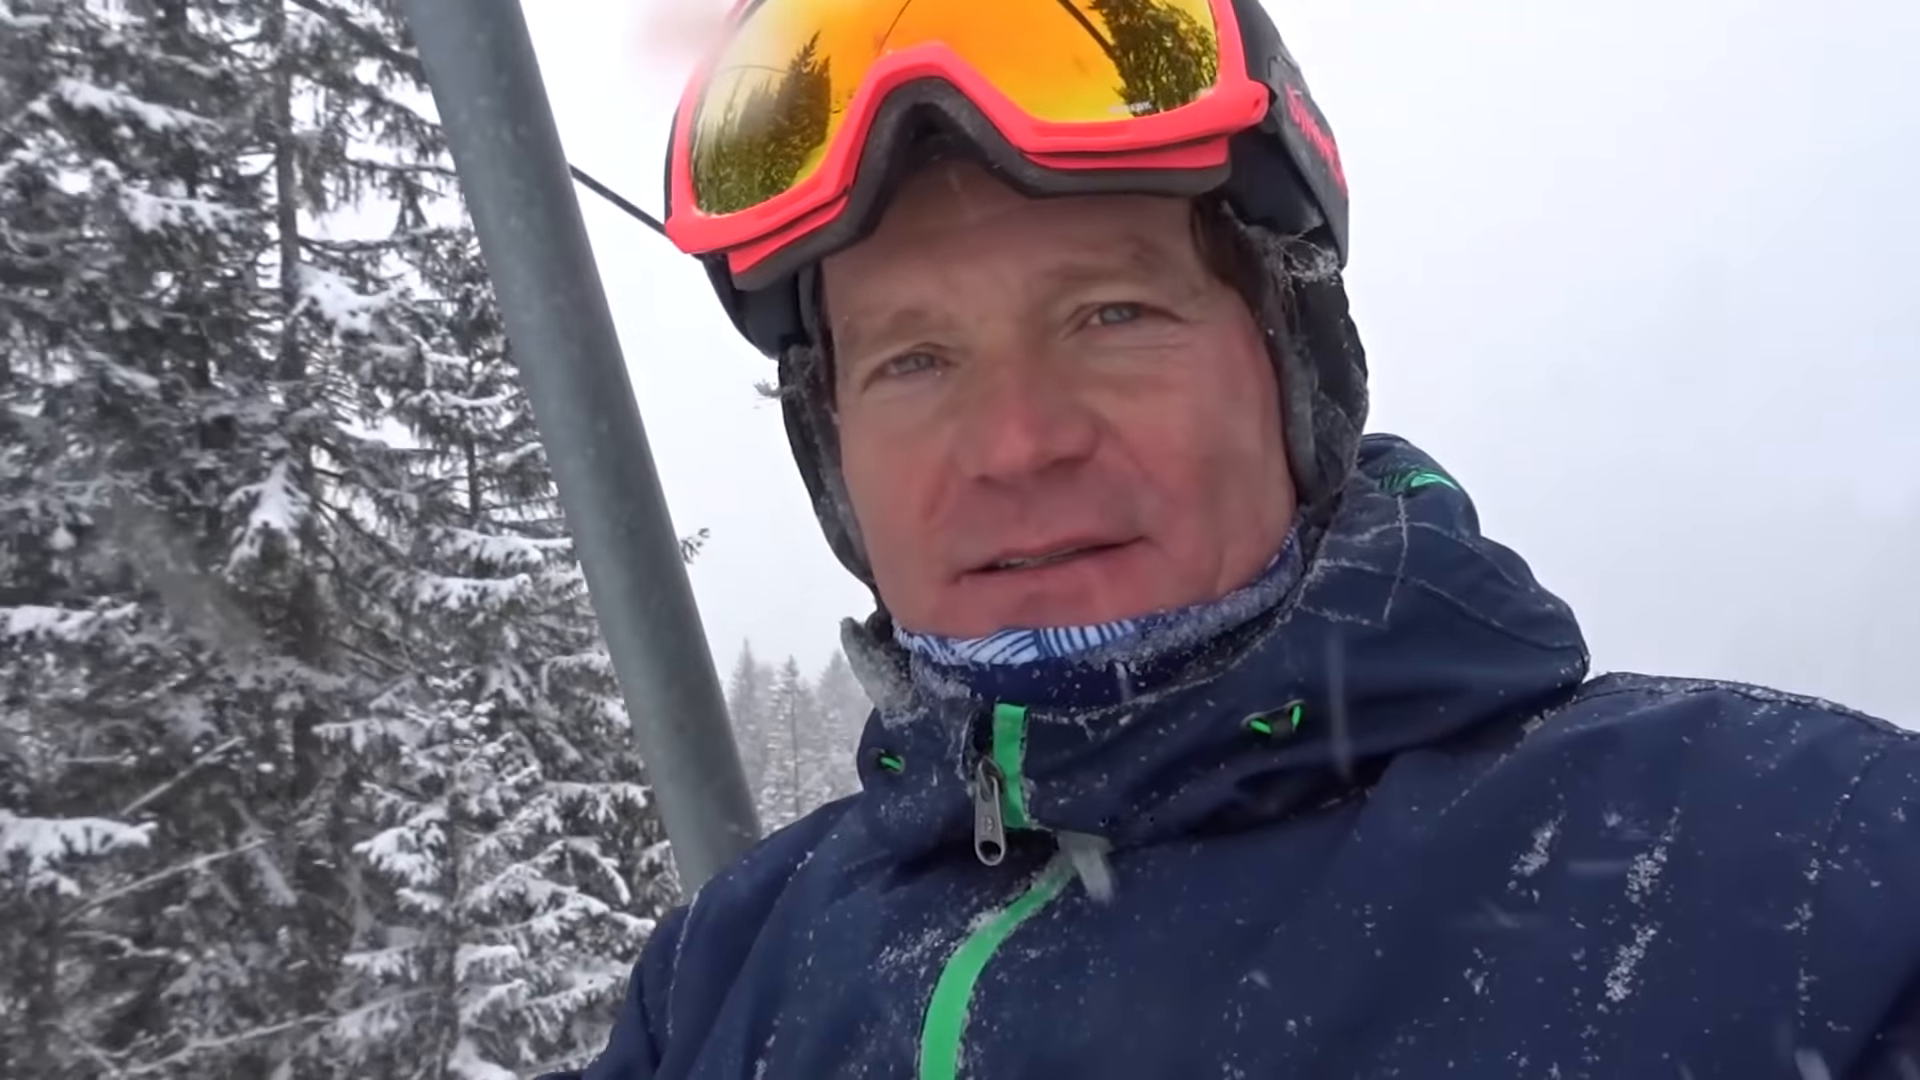

In [7]:
face_to_draw = faces_detected[0]

first_face = get_face_frame(clip, face_to_draw)
first_face

Scale the face coordinates to the image dimensions.

In [8]:
def scale_bb_to_image(y0, x1, y1, x0):
    """ Scales a bounding box to the image using the global RESIZE_DIM variable. """

    w, h = clip.size
    width_ratio = w / RESIZE_DIM
    height_ratio = h / RESIZE_DIM

    y0 = int(y0 * height_ratio)
    y1 = int(y1 * height_ratio)
    x0 = int(x0 * width_ratio)
    x1 = int(x1 * width_ratio)
    
    return [x0, y0, x1, y1]

Crop the image to the face

In [9]:
def crop_image(img, x0, y0, x1, y1):
    """ Crops an image to the bounding box consisting of the points x0, y0, x1, y1. """

    img_array = np.array(img)
    cropped_img_array = img_array[y0:y1, x0:x1]
    return Image.fromarray(cropped_img_array)

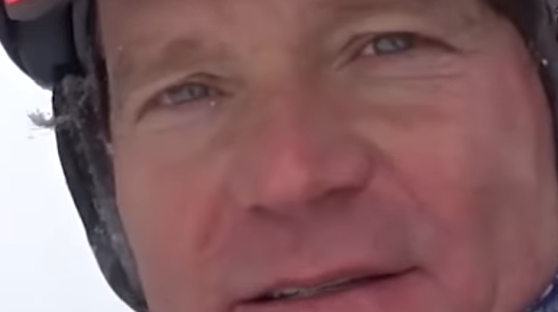

In [10]:
scaled_bb = scale_bb_to_image(*face_to_draw['faces'][0]['bb_faces'])
crop_image(first_face, *scaled_bb)

Draw the bounding box on top of the image of the detected face. From the PIL documentation: Sequence of either [(x0, y0), (x1, y1)] or [x0, y0, x1, y1], where x1 >= x0 and y1 >= y0. 

In [11]:
def draw_bounding_box(img, x0, y0, x1, y1):
    """ Draw a bounding box (consisting of the points x0, y0, x1, y1) on top of a frame. """
    copy = img.copy()
    draw = ImageDraw.Draw(copy)
    draw.rectangle([x0, y0, x1, y1], fill=None, outline='blue')
    return copy

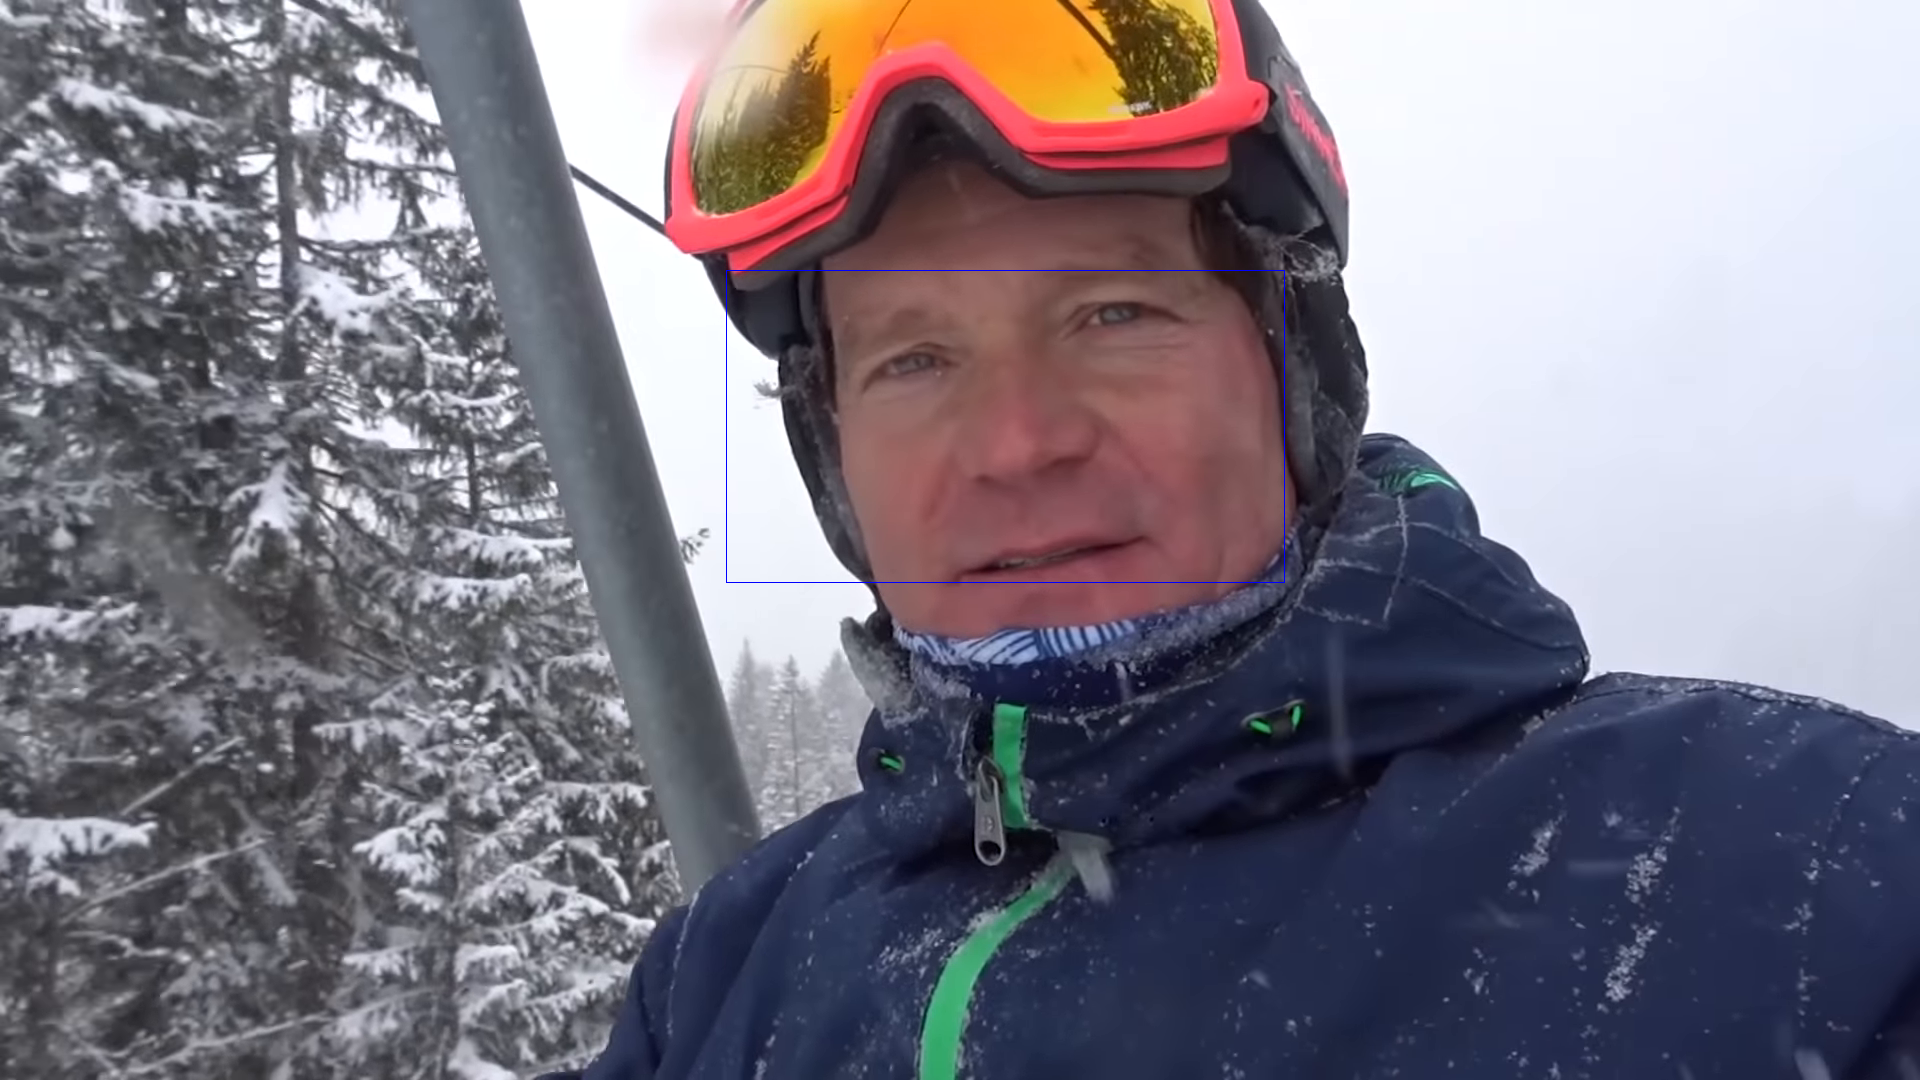

In [12]:
draw_bounding_box(first_face, *scaled_bb)

In [13]:
for face in faces_detected:
    frame = get_face_frame(clip, face)
    scaled_bb = scale_bb_to_image(*face['faces'][0]['bb_faces'])
    bb_frame = draw_bounding_box(frame, *scaled_bb)
    bb_frame.show()


(eog:51080): EOG-CRITICAL **: 17:03:16.661: eog_image_get_file: assertion 'EOG_IS_IMAGE (img)' failed

(eog:51080): GLib-GIO-CRITICAL **: 17:03:16.661: g_file_equal: assertion 'G_IS_FILE (file1)' failed

(eog:51080): EOG-CRITICAL **: 17:03:16.661: eog_image_get_file: assertion 'EOG_IS_IMAGE (img)' failed

(eog:51080): GLib-GIO-CRITICAL **: 17:03:16.661: g_file_equal: assertion 'G_IS_FILE (file1)' failed

(eog:51080): EOG-CRITICAL **: 17:03:16.785: eog_image_get_file: assertion 'EOG_IS_IMAGE (img)' failed

(eog:51080): GLib-GIO-CRITICAL **: 17:03:16.785: g_file_equal: assertion 'G_IS_FILE (file1)' failed

(eog:51080): EOG-CRITICAL **: 17:03:16.914: eog_image_get_file: assertion 'EOG_IS_IMAGE (img)' failed

(eog:51080): GLib-GIO-CRITICAL **: 17:03:16.914: g_file_equal: assertion 'G_IS_FILE (file1)' failed

(eog:51080): EOG-CRITICAL **: 17:03:17.030: eog_image_get_file: assertion 'EOG_IS_IMAGE (img)' failed

(eog:51080): GLib-GIO-CRITICAL **: 17:03:17.030: g_file_equal: assertion 'G_IS_F

[5278, 6552, 6734, 7644, 8918, 11466, 11648, 13650, 17654]
